# Computer Vision - Programming Assignment - 1
## __Abinash Biswal - 1002175520__

### Summary of Functions Used

This code performs various image processing functions using the OpenCV and NumPy libraries.

1. `extractColorsFromImage(img)`:
   - Extracts the Red, Green, and Blue channels from an image and returns them as separate 2D arrays.

2. `read_BGR_image_and_return_RGB_image(location)`:
   - Reads an image in BGR format and converts it to RGB format using OpenCV.

3. `read_and_convert_to_hsv(location)`:
   - Reads an image in BGR format, converts it to RGB, and then converts the RGB image to HSV.

4. `convert_hsv_to_rgb(hsv_image)`:
   - Converts an image from HSV format back to RGB format.

5. `printImage(image)`:
   - Displays the image using matplotlib.

6. `applyNonLinearHigherContrast(pixelValue)`:
   - Applies a nonlinear contrast formula to increase contrast for a single pixel value.

7. `applyNonLinearHigherContrastFormulaOnImageAndReturnNewImage(image)`:
   - Applies the higher contrast formula to all pixels in an image and returns the modified image.

8. `invertPixelValues(pixelValue)`:
   - Inverts the pixel value by subtracting it from 255.

9. `applyInvertPixelFormulaOnImageAndReturnNewImage(image)`:
   - Applies pixel inversion to all pixels in an image and returns the modified image.

10. `subtractValueFromPixel(pixelValue, subtractionNumber)`:
    - Subtracts a given value from a pixel value. If the subtraction is larger than the pixel value, the calculation wraps around (like cyclic subtraction).

11. `makeImageDarkerBySubtracting_128(myImage1)`:
    - Makes the image darker by subtracting 128 from each pixel value, while handling wraparound.

12. `applyNonLinearLowerContrastonPixel(pixelValue)`:
    - Applies a nonlinear contrast formula to reduce contrast for a single pixel value.

13. `applyNonLinearLowerContrastFormulaOnImageAndReturnNewImage(image)`:
    - Applies the lower contrast formula to all pixels in an image and returns the modified image.

14. `makePixelBrighter(pixelValue)`:
    - Increases the brightness of a pixel by adding 128, with wraparound if the value exceeds 255.

15. `applyMakePixelBrighterFormulaOnImageAndReturnNewImage(image)`:
    - Applies the brightness increase formula to all pixels in an image and returns the modified image.


# Importing required libraries

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Functions

In [6]:
def extractColorsFromImage (img):
    red_2D_Array = list()
    green_2D_Array = list()
    blue_2D_Array = list()
    
    for i in img:
        r_row = list()
        g_row = list()
        b_row = list()
        for j in i:
            r_row.append(j[0])
            g_row.append(j[1])
            b_row.append(j[2])
        red_2D_Array.append(r_row)
        green_2D_Array.append(g_row)
        blue_2D_Array.append(b_row)

    return [red_2D_Array, green_2D_Array, blue_2D_Array]

#------------------------------------------------------------------------------
def read_BGR_image_and_return_RGB_image (location):
    
    bgrImage = cv2.imread(location)
    rgbImage = cv2.cvtColor(bgrImage , cv2.COLOR_BGR2RGB)
    
    return rgbImage
#------------------------------------------------------------------------------
def read_and_convert_to_hsv(location):
    # Read the image in BGR format
    bgr_image = cv2.imread(location)
    
    # Convert BGR to RGB
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    
    # Convert RGB to HSV
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    return hsv_image



#------------------------------------------------------------------------------


def convert_hsv_to_rgb(hsv_image):
    # Convert HSV back to RGB
    rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return rgb_image

#------------------------------------------------------------------------------

def printImage (image):

    plt.imshow(image)
    plt.show()
#------------------------------------------------------------------------------

def applyNonLinearHigherContrast (pixelValue):
    num = math.floor(((pixelValue/255) ** 2) * 255)    
    return num


def applyNonLinearHigherContrastFormulaOnImageAndReturnNewImage (image):
    
    l = list(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            l[i][j][0] = applyNonLinearHigherContrast(l[i][j][0])
            l[i][j][1] = applyNonLinearHigherContrast(l[i][j][1])
            l[i][j][2] = applyNonLinearHigherContrast(l[i][j][2])

    n = np.array(l)

    return n

# ------------------------------------------------------------------------------

def invertPixelValues (pixelValue):
    return 255- pixelValue



def applyInvertPixelFormulaOnImageAndReturnNewImage (image):
    
    l = list(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            l[i][j][0] = invertPixelValues(l[i][j][0])
            l[i][j][1] = invertPixelValues(l[i][j][1])
            l[i][j][2] = invertPixelValues(l[i][j][2])

    n = np.array(l)

    return n

# ------------------------------------------------------------------------------

def subtractValueFromPixel (pixelValue, subtractionNumber):
    if subtractionNumber < pixelValue:
        # print("hi")
        return pixelValue - subtractionNumber
    else:
        # print("Bye")
        # return 255 + pixelValue - subtractionNumber
        return 0

def makeImageDarkerBySubtracting_128 (myImage1):
    img = list(myImage1)
    
    for i in range(myImage1.shape[0]):
        for j in range(myImage1.shape[1]):
            img[i][j][0] = subtractValueFromPixel(img[i][j][0] , 128)
            img[i][j][1] = subtractValueFromPixel(img[i][j][1] , 128)
            img[i][j][2] = subtractValueFromPixel(img[i][j][2] , 128)
    
    return img

# ------------------------------------------------------------------------------

def applyNonLinearLowerContrastonPixel (pixelValue):
    num = math.floor(((pixelValue/255) ** (1/3)) * 255)    
    return num

def applyNonLinearLowerContrastFormulaOnImageAndReturnNewImage (image):
    
    l = list(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            l[i][j][0] = applyNonLinearLowerContrastonPixel(l[i][j][0])
            l[i][j][1] = applyNonLinearLowerContrastonPixel(l[i][j][1])
            l[i][j][2] = applyNonLinearLowerContrastonPixel(l[i][j][2])

    n = np.array(l)

    return n
# ------------------------------------------------------------------------------

def makePixelBrighter (pixelValue):
    if 128 + pixelValue > 255:
        # return 128 + pixelValue - 255
        return 255
    else:
        return 128 + pixelValue


def applyMakePixelBrighterFormulaOnImageAndReturnNewImage (image):
    
    l = list(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            l[i][j][0] = makePixelBrighter(l[i][j][0])
            l[i][j][1] = makePixelBrighter(l[i][j][1])
            l[i][j][2] = makePixelBrighter(l[i][j][2])

    n = np.array(l)

    return n

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

# Task 1 - A
## Display the Red, Green and Blue color channels separately in a 1X3 plot. Use grayscale colormap for displaying the images (cmap = "gray" in matplotlib)

# Solution

The code solves the task of displaying the Red, Green, and Blue color channels separately from an image and shows them in a 1x3 plot using grayscale colormap. The steps are as follows:

1. __Read the RGB Image__: The image is read from the file path `./Images/rgb.png` and stored in `myRGB_image_3d_Array`.

2. __Extract Color Channels__:
   - The function `extractColorsFromImage()` is used to extract the Red, Green, and Blue color channels from the RGB image.
   - The `colors` variable stores the individual color channels in a list: `colors[0]` for Red, `colors[1]` for Green, and `colors[2]` for Blue.

3. __Create Subplots and Display Channels__:
   - A 1x3 subplot is created to display the three color channels side by side.
   - The Red channel is displayed using the grayscale colormap (`cmap='gray'`), and it is titled "Red Channel".
   - The Green channel is displayed using the same colormap and titled "Green Channel".
   - The Blue channel is displayed similarly and titled "Blue Channel".
   - The `plt.tight_layout()` function is used to adjust the layout and avoid overlap.

4. __Show the Plots__:
   - The `plt.show()` function is called to render and display the plots.

By following these steps, the code effectively isolates and displays each color channel of the image in grayscale, providing a clear visual representation of the Red, Green, and Blue components.


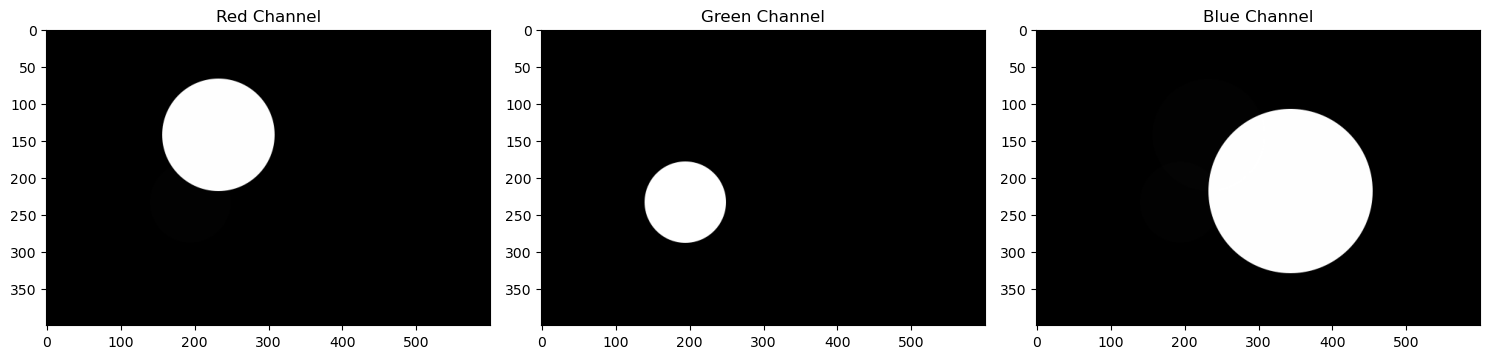

In [9]:
# Read the RGB image from the given file path
myRGB_image_3d_Array = read_BGR_image_and_return_RGB_image("./Images/rgb.png")

# Extract the Red, Green, and Blue channels from the image
colors = extractColorsFromImage(myRGB_image_3d_Array)

# Create a 1x3 subplot to display the color channels
figure, arrayOfPlots = plt.subplots(1, 3, figsize=(15, 5))

# Display the Red channel in grayscale
arrayOfPlots[0].imshow(colors[0], cmap='gray')
arrayOfPlots[0].set_title("Red Channel")

# Display the Green channel in grayscale
arrayOfPlots[1].imshow(colors[1], cmap='gray')
arrayOfPlots[1].set_title("Green Channel")

# Display the Blue channel in grayscale
arrayOfPlots[2].imshow(colors[2], cmap='gray')
arrayOfPlots[2].set_title("Blue Channel")

# Adjust layout to avoid overlap and show the plots
plt.tight_layout()
plt.show()


# Task 1 - B
## Convert the image to grayscale using the formula, grayscale = ((Red + Green + Blue) / 3) and display the image.

# Solution

The code solves the task of converting an RGB image to grayscale and displaying the result using the following steps:

1. __Read the RGB Image__: 
   - The image is read from the file path `./Images/rgb.png` and stored in `myRGB_image_3d_Array`.

2. __Convert to Grayscale__:
   - An empty list `grey_scale_2D_array` is initialized to store the grayscale image data.
   - The code loops through each pixel of the image:
     - For each pixel, it calculates the sum of the Red, Green, and Blue values.
     - It computes the average of these values to get the grayscale value using the formula: `grayscale = (Red + Green + Blue) / 3`.
     - The average value is floored to ensure it is an integer and then added to the `row` list.
   - After processing all pixels in a row, the row is appended to the `grey_scale_2D_array`.
   - This results in a 2D array representing the grayscale image.

3. __Display the Grayscale Image__:
   - The grayscale image is displayed using `plt.imshow()` with the grayscale colormap (`cmap="gray"`).
   - The `plt.show()` function is called to render and display the image.

By following these steps, the code effectively converts the RGB image to grayscale by averaging the color channels and displays the resulting grayscale image.


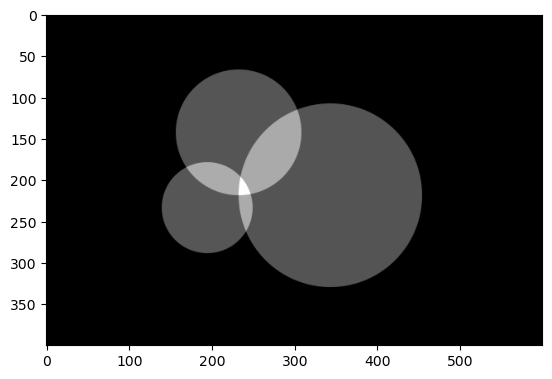

In [12]:
myRGB_image_3d_Array = read_BGR_image_and_return_RGB_image('./Images/rgb.png')

grey_scale_2D_array = list()

for i in myRGB_image_3d_Array:
    row = list()
    for j in i:
        sum = 0
        for k in j:
            sum += k
        avg = sum / 3
        x = math.floor(avg)
        row.append(x)
    grey_scale_2D_array.append(row)

plt.imshow(grey_scale_2D_array, cmap="gray")
plt.show()



# Task 1 - C
## Apply an appropriate mask on the "rgb.png" image based on pixel intensity values to display the red pixels only.

# Solution

The code solves the task of displaying only the red pixels from an RGB image by applying a suitable mask. The process is as follows:

1. __Read Image__:
   - The image is read from the file path `./Images/rgb.png` and stored in `myImage_task_1C`.

2. __Initialize List__:
   - An empty list, `imList`, is created to hold the pixel data for the modified image.

3. __Get Image Dimensions__:
   - The number of rows and columns in the image is determined using the `shape` attribute of `myImage_task_1C`.

4. __Process Each Pixel__:
   - The code loops through each pixel in the image.
   - For each pixel, it checks if the Green (`myImage_task_1C[row][col][1]`) or Blue (`myImage_task_1C[row][col][2]`) component is greater than 100.
     - If either condition is met, the pixel is set to black `[0, 0, 0]`.
     - If neither condition is met, the pixel retains its original color.
   - This effectively masks out non-red pixels.

5. __Create Modified Image__:
   - The processed pixel data is appended to `imList`, which constructs the modified image where only red pixels are visible.

6. __Display Image__:
   - The modified image is displayed using `plt.imshow()`, which shows the result of the masking process.

By following these steps, the code effectively isolates and displays only the red pixels from the original image.


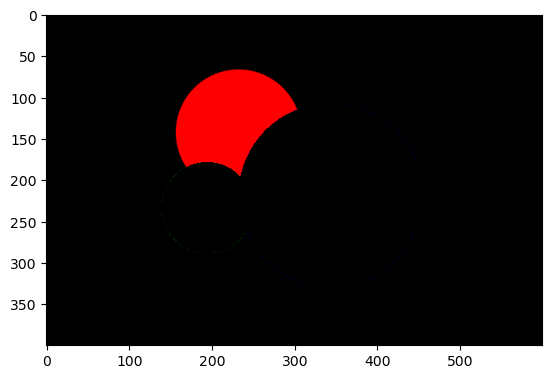

In [15]:
myImage_task_1C = read_BGR_image_and_return_RGB_image('./Images/rgb.png')

imList = list()

rows = myImage_task_1C.shape[0]
columns = myImage_task_1C.shape[1]

for row in range(rows):
    r = list()
    for col in range(columns):
        if myImage_task_1C[row][col][1] > 100 or myImage_task_1C[row][col][2] > 100:
            r.append([0,0,0])
        else:
            r.append(list(myImage_task_1C[row][col]))
    imList.append(r)

plt.imshow(imList)
plt.show()

# Task 1 - D
## Convert the "rgb.png" image to HSV, adjust the value/brightness value in the HSV image to 50%, convert the HSV back to RGB, and display the result.

The code solves the task of converting an image to HSV, adjusting the brightness, and then converting it back to RGB in the following steps:

1. __Read the RGB Image__: The original image is read and stored in `rgb_image`. This is the starting point for the conversion and processing.

2. __Convert to HSV__: The image is converted from RGB to HSV color space using `read_and_convert_to_hsv()`. __HSV (Hue, Saturation, Value)__ separates the image’s color information from its brightness information. This allows for direct manipulation of brightness.

3. __Adjust Brightness__:
   - The HSV image is converted to a list `x` for easier manipulation.
   - The code loops through each pixel and modifies the __Value (V)__ component of the HSV representation. It reduces the brightness of each pixel by __50%__ (`x[i][j][2] * 0.5`).
   - This adjustment effectively dims the image.

4. __Convert Back to RGB__: After adjusting the brightness, the HSV image is converted back to RGB format using `convert_hsv_to_rgb()`. This results in an image where only the brightness has been modified, while the color information remains unchanged.

5. __Display Results__:
   - The code uses subplots to display two images side by side:
     - The first subplot shows the __adjusted image with reduced brightness__.
     - The second subplot shows the __original image__ for comparison.
   - This allows for a visual comparison of the effect of the brightness adjustment.

By following these steps, the code effectively demonstrates how to modify the brightness of an image while preserving its color characteristics and then presents a side-by-side comparison of the original and adjusted images.


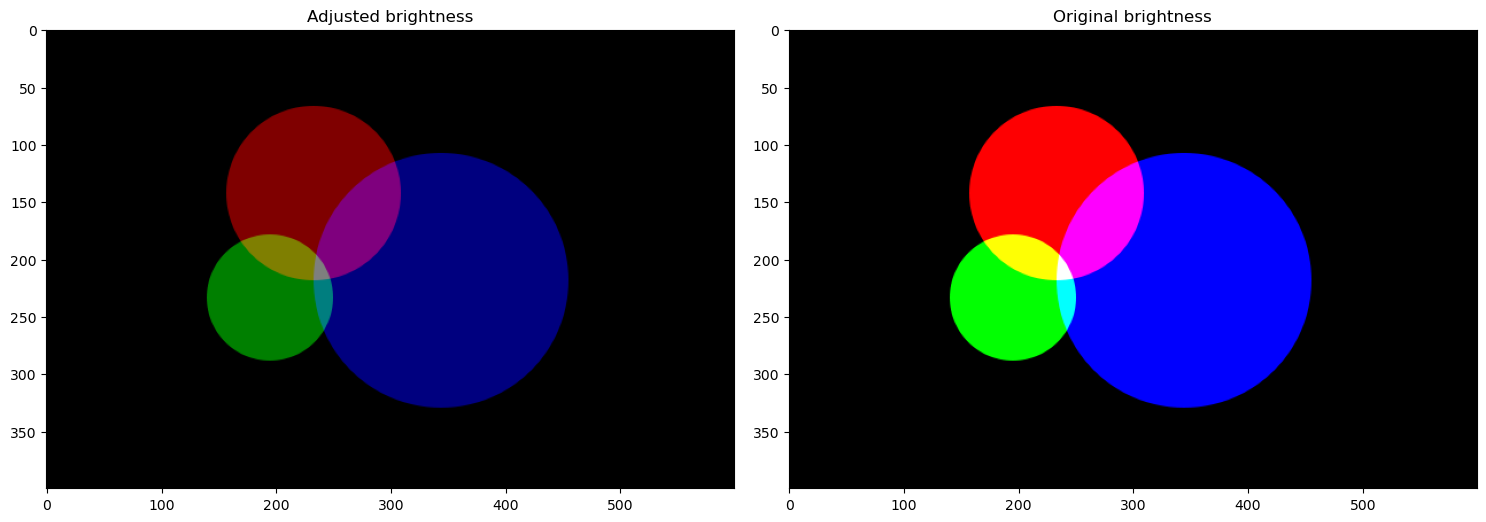

In [18]:
rgb_image = read_BGR_image_and_return_RGB_image('./Images/rgb.png')
hsv_image = read_and_convert_to_hsv('./Images/rgb.png')

x = list(hsv_image)

for i in range(hsv_image.shape[0]):
    for j in range(hsv_image.shape[1]):
        reducedValue = math.floor(x[i][j][2] * 0.5)
        x[i][j][2] = reducedValue

npArray_HSV = np.array(x)

adjusted_rgb_image = convert_hsv_to_rgb(npArray_HSV)


figure , arrayOfImages = plt.subplots(1 , 2 , figsize=(15 , 5))

arrayOfImages[0].imshow(adjusted_rgb_image)
arrayOfImages[0].set_title("Adjusted brightness")

arrayOfImages[1].imshow(rgb_image)
arrayOfImages[1].set_title("Original brightness")


plt.tight_layout()
plt.show()

# Task 2 - A
## Import the "apple.jpg" image
## We'd like to extract the green apple from the image above. Apply a suitable mask to extract the green apple from the RGB image. Then, covert the image to HSV space and apply a suitable mask to extract the green apple.

## Display the original image, the masked image in RGB space and the masked image in HSV color space in a 1X3 plot.

# Solution

The code solves the task of extracting the green apple from the image and displaying the results using both RGB and HSV color spaces in the following steps:

1. __Import the Image__: The image is read from the file path `./Images/apple.jpg` and stored in `img2`.

2. __Extract Green Apple in RGB Space__:
   - The code iterates through each pixel in the image.
   - It applies a mask to identify pixels that represent the green apple. Specifically, it checks if the pixel’s Red value is less than 200 or the Blue value is less than 200, and if the Green value is greater than 40.
   - For pixels that match this criterion, the pixel is set to white `[255, 255, 255]`. All other pixels are left unchanged.
   - This creates a masked image where the green apple is highlighted.

3. __Extract Green Apple in HSV Space__:
   - The image is again read and converted to HSV color space and stored in `hsvApple`.
   - A mask is applied to identify the green apple based on HSV values. It checks if the Hue value is between 35 and 47 to identify green tones.
   - Pixels that do not match this criterion have their Value component set to 0, effectively masking them out.
   - Further masking is done to ensure only relevant green hues are retained by checking the Saturation component and setting the Value to 0 for lower saturation values.
   - The modified HSV image is converted back to RGB to create the masked image in RGB color space.

4. __Display Results__:
   - The original image, the masked image in RGB space, and the masked image in HSV space are displayed side by side using subplots.
   - The first subplot shows the __Original Image__.
   - The second subplot shows the __RGB Masked Image__ with the green apple extracted.
   - The third subplot shows the __HSV Masked Image__ with the green apple extracted.
   - This provides a visual comparison of the extraction results using different color spaces.

By following these steps, the code demonstrates how to apply masks in both RGB and HSV color spaces to isolate and highlight the green apple in the image, and then displays the results for comparison.


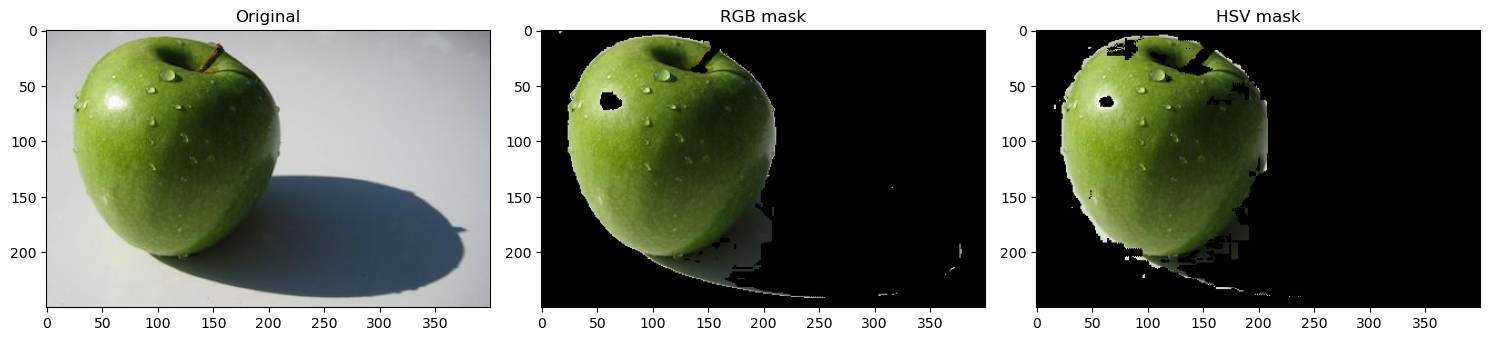

In [21]:
img2 = read_BGR_image_and_return_RGB_image('./Images/apple.jpg')

for row in range(img2.shape[0]):
    for col in range(img2.shape[1]):
        if (img2[row][col][0] < 200 or img2[row][col][2] < 200) and img2[row][col][1] > 40:
            l = [row , col , img2[row][col][0], img2[row][col][1] , img2[row][col][2]]
            img2[row][col][0] = 255
            img2[row][col][1] = 255
            img2[row][col][2] = 255
        else:
            continue


img = read_BGR_image_and_return_RGB_image('./Images/apple.jpg')


for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if img[row][col][1] > img[row][col][0] and img[row][col][1] > img[row][col][2]:
            l = [row , col , img[row][col][0], img[row][col][1] , img[row][col][2]]
        else:
            img[row][col][0] = 0
            img[row][col][1] = 0
            img[row][col][2] = 0


for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j][0] > 180 and img[i][j][1] > 180 and img[i][j][2] > 180:
            img[i][j][0] = 0
            img[i][j][1] = 0
            img[i][j][2] = 0

rgbMaskedApple = img.copy()


# ------------------------------------------------------------------------------


hsvApple = read_and_convert_to_hsv('./Images/apple.jpg')


for i in range(hsvApple.shape[0]):
    for j in range(hsvApple.shape[1]):
        if hsvApple[i][j][0] > 35 and hsvApple[i][j][0] < 47:
            continue
        else:
            hsvApple[i][j][2] = 0

for i in range(hsvApple.shape[0]):
    for j in range(hsvApple.shape[1]):
        if hsvApple[i][j][1] > 10:
            continue
        else:
            hsvApple[i][j][2] = 0


hsv_MaskedApple = convert_hsv_to_rgb(hsvApple)

original = read_BGR_image_and_return_RGB_image('./Images/apple.jpg')


figure, arr = plt.subplots(1 , 3 , figsize=(15, 5))
arr[0].imshow(original)
arr[0].set_title("Original")
arr[1].imshow(rgbMaskedApple)
arr[1].set_title("RGB mask")
arr[2].imshow(hsv_MaskedApple)
arr[2].set_title("HSV mask")

plt.tight_layout()
plt.show()

# Task 2 - B
## Import the "bags.png" image. We'd like to extract the orange bag from the image above. Apply a suitable mask to extract the orange bag in RGB color space. Then, covert the image to HSV space and apply a suitable mask to extract the same orange bag. 
## Display the original image, the masked image in RGB space and the masked image in HSV color space in a 1X3 plot.

# Solution

The code solves the task of extracting the orange bag from the image and displaying the results using both RGB and HSV color spaces in the following steps:

1. __Import the Image__: The image is read from the file path `./Images/bags.png` and stored in `my_RGB_image`.

2. __Extract Orange Bag in RGB Space__:
   - The code iterates through each pixel in the RGB image.
   - A mask is applied to identify pixels that represent the orange bag. Specifically, it checks if the Red component is between 170 and 255 and the Green component is less than 150.
   - For pixels that match this criterion, they are set to white `[255, 255, 255]`.
   - All other pixels are set to black `[0, 0, 0]`.
   - A specific region in the image is also set to black to further refine the mask.
   - The resulting masked image is stored in `my_RGB_image`.

3. __Create Final RGB Masked Image__:
   - The code identifies the black pixels in `my_RGB_image` and stores their coordinates in `targetList`.
   - It then creates a copy of the original image and sets the corresponding pixels in this copy to black.
   - The final RGB masked image is stored in `rgbMasked_task3b`.

4. __Extract Orange Bag in HSV Space__:
   - The image is converted to HSV color space and stored in `img`.
   - A mask is applied to identify the orange bag based on Hue values. The code checks if the Hue value is between 5 and 13 to identify the orange color.
   - Pixels not matching this criterion have their Value component set to 0.
   - The modified HSV image is converted back to RGB format and stored in `hsv_mask_task3b`.

5. __Display Results__:
   - The original image, the masked image in RGB space, and the masked image in HSV space are displayed side by side using subplots.
   - The first subplot shows the __Original Image__.
   - The second subplot shows the __RGB Masked Image__ with the orange bag extracted.
   - The third subplot shows the __HSV Masked Image__ with the orange bag extracted.
   - This allows for a visual comparison of the extraction results using different color spaces.

By following these steps, the code demonstrates how to apply masks in both RGB and HSV color spaces to isolate and highlight the orange bag in the image, and then presents the results for comparison.


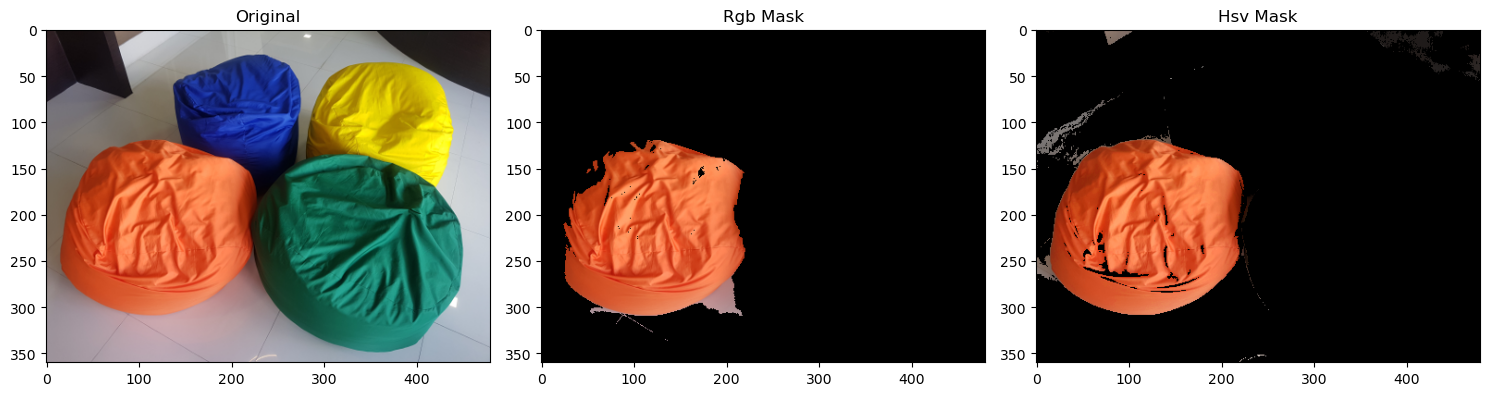

In [24]:
my_RGB_image = read_BGR_image_and_return_RGB_image('./Images/bags.png')


for i in range(my_RGB_image.shape[0]):
    for j in range(my_RGB_image.shape[1]):
        if my_RGB_image[i][j][0] > 170 and my_RGB_image[i][j][0] < 255 and my_RGB_image[i][j][1] < 150:
            my_RGB_image[i][j][0] = 255
            my_RGB_image[i][j][1] = 255
            my_RGB_image[i][j][2] = 255
            

for i in range(my_RGB_image.shape[0]):
    for j in range(my_RGB_image.shape[1]):
        if my_RGB_image[i][j][0] != 255 and my_RGB_image[i][j][1] != 255 and my_RGB_image[i][j][2] != 255:
            my_RGB_image[i][j][0] = 0
            my_RGB_image[i][j][1] = 0
            my_RGB_image[i][j][2] = 0
            

for i in range(350):
    for j in range (280, 480):
        my_RGB_image[i][j][0] = 0
        my_RGB_image[i][j][1] = 0
        my_RGB_image[i][j][2] = 0
        
targetList = list()

for row in range(my_RGB_image.shape[0]):
    for col in range(my_RGB_image.shape[1]):
        if my_RGB_image[row][col][0] == 0 and my_RGB_image[row][col][1] == 0 and my_RGB_image[row][col][2] == 0:
            # num += 1
            l = [row , col]
            targetList.append(l)
            
newImage = read_BGR_image_and_return_RGB_image('./Images/bags.png')

for i in targetList:
    newImage[i[0]][i[1]][0] = 0
    newImage[i[0]][i[1]][1] = 0
    newImage[i[0]][i[1]][2] = 0

rgbMasked_task3b = newImage.copy()



#---------------------------------------------------------------------------------




img = read_and_convert_to_hsv('./Images/bags.png')


for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j][0] > 5 and img[i][j][0] < 13:
            continue
        else:
            img[i][j][2] = 0
            


hsv_mask_task3b = convert_hsv_to_rgb(img)

originalTask3_b = read_BGR_image_and_return_RGB_image('./Images/bags.png')


figure, arr = plt.subplots(1 , 3 , figsize = (15, 5))

arr[0].imshow(originalTask3_b)
arr[0].set_title("Original")
arr[1].imshow(rgbMasked_task3b)
arr[1].set_title("Rgb Mask")
arr[2].imshow(hsv_mask_task3b)
arr[2].set_title("Hsv Mask")

plt.tight_layout()
plt.show()

# Task 3 - A , B , C , D , E

## Import the "bird.jpg" image and apply the following point processing to it.

## a) Create a darker image by subtracting 128 from each pixel intensity value.

## b) Create a nonlinear lower contrast image by applying the formula $(x / 255)^{1/3}$ X 255, where x is the original pixel intensity.

## c) Invert the original image where the pixel values are updated as 255 - current pixel intensity value.

## d) Create a brighter image by adding 128 to each pixel intensity value.

## e) Create a nonlinear higher contrast image by applying the formula $(x / 255)^{2}$ X 255, where x is the original pixel intensity.

### Display all of these images along with the original image in a 2X3 grid.

# Solution

The code applies several point processing techniques to the image "bird.jpg" and displays the results in a 2x3 grid. The tasks performed are:

1. __Read the Original Image__:
   - The image is read from the file path `./Images/bird.jpg` and stored in `originalImage`.

2. __Task A - Darker Image__:
   - The image is processed by subtracting 128 from each pixel intensity value to create a darker image.
   - The resulting image is stored in `newImage_task1`.

3. __Task B - Non-Linear Lower Contrast Image__:
   - The image is processed using the formula $(x / 255)^{1/3}$ X 255, where \(x\) is the original pixel intensity.
   - This formula reduces the contrast non-linearly.
   - The resulting image is stored in `newImage_task2`.

4. __Task C - Inverted Image__:
   - The image is processed by inverting the pixel values using the formula \(255 - x\), where \(x\) is the original pixel intensity.
   - This creates a negative effect on the image.
   - The resulting image is stored in `newImage_task3`.

5. __Task D - Brighter Image__:
   - The image is processed by adding 128 to each pixel intensity value to create a brighter image.
   - The resulting image is stored in `newImage_task4`.

6. __Task E - Non-Linear Higher Contrast Image__:
   - The image is processed using the formula $(x / 255)^{2}$ X 255, where \(x\) is the original pixel intensity.
   - This formula increases the contrast non-linearly.
   - The resulting image is stored in `newImage_task5`.

7. __Display Images__:
   - A 2x3 grid of subplots is created to display the original image and the processed images.
   - Each subplot is titled according to the task it represents:
     - The first column displays the original image and the darker image.
     - The second column displays the non-linear lower contrast image and the inverted image.
     - The third column displays the brighter image and the non-linear higher contrast image.
   - The `plt.tight_layout()` function is used to adjust the layout and avoid overlap.

By following these steps, the code effectively demonstrates how various point processing techniques affect the appearance of an image and presents the results in a clear and organized manner.


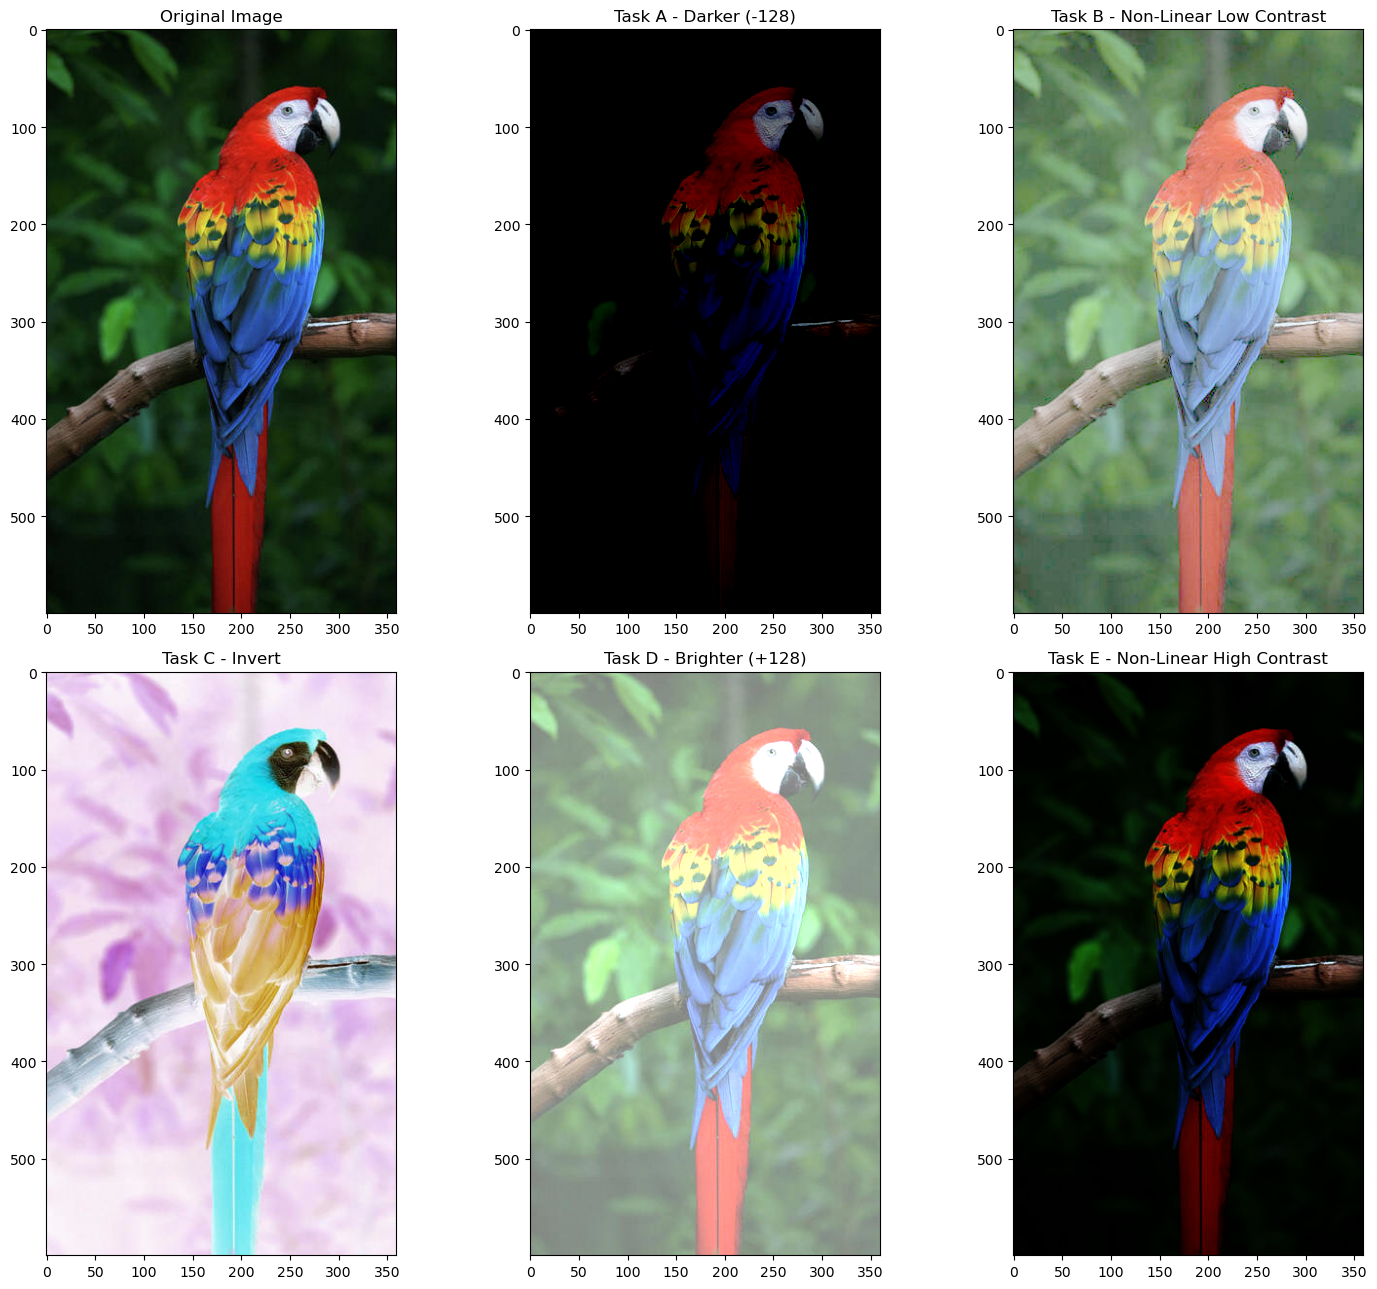

In [27]:
originalImage = read_BGR_image_and_return_RGB_image('./Images/bird.jpg')


myImageForTask1 = read_BGR_image_and_return_RGB_image('./Images/bird.jpg')
newImage_task1 = makeImageDarkerBySubtracting_128(myImageForTask1)


myImageForTask2 = read_BGR_image_and_return_RGB_image('./Images/bird.jpg')
newImage_task2 = applyNonLinearLowerContrastFormulaOnImageAndReturnNewImage(myImageForTask2)


myImageForTask3 = read_BGR_image_and_return_RGB_image('./Images/bird.jpg')
newImage_task3 = applyInvertPixelFormulaOnImageAndReturnNewImage(myImageForTask3)


imageForTask4 = read_BGR_image_and_return_RGB_image('./Images/bird.jpg')
newImage_task4 = applyMakePixelBrighterFormulaOnImageAndReturnNewImage(imageForTask4)


imageForTask5 = read_BGR_image_and_return_RGB_image('./Images/bird.jpg')
newImage_task5 = applyNonLinearHigherContrastFormulaOnImageAndReturnNewImage(imageForTask5)




figure , arrayOfImages = plt.subplots (2 , 3 , figsize = (15 , 13))

arrayOfImages[0, 0].imshow(originalImage)
arrayOfImages[0, 0].set_title("Original Image")
arrayOfImages[0, 1].imshow(newImage_task1)
arrayOfImages[0, 1].set_title("Task A - Darker (-128)")
arrayOfImages[0, 2].imshow(newImage_task2)
arrayOfImages[0, 2].set_title("Task B - Non-Linear Low Contrast")

# Second row
arrayOfImages[1, 0].imshow(newImage_task3)
arrayOfImages[1, 0].set_title("Task C - Invert")
arrayOfImages[1, 1].imshow(newImage_task4)
arrayOfImages[1, 1].set_title("Task D - Brighter (+128)")
arrayOfImages[1, 2].imshow(newImage_task5)
arrayOfImages[1, 2].set_title("Task E - Non-Linear High Contrast")


plt.tight_layout()
plt.show()

# Task 4 - A
## Perform average blur with kernel size 7X7 and 15X15. Display the original image with the filtered/processed images in a 1X3 grid

# Solution
The code performs average blurring on the image "cameraman.jpeg" using two different kernel sizes and displays the results in a 1x3 grid. The steps are as follows:

1. __Read the Original Image__:
   - The image is read from the file path `./Images/cameraman.jpeg` and stored in `image`.

2. __Apply Average Blur with Kernel Size 7x7__:
   - The `cv2.blur()` function is used to apply average blurring with a kernel size of 7x7.
   - The resulting blurred image is stored in `avg_blur_7x7`.

3. __Apply Average Blur with Kernel Size 15x15__:
   - The `cv2.blur()` function is used again, this time with a kernel size of 15x15.
   - The resulting blurred image is stored in `avg_blur_15x15`.

4. __Display Images__:
   - A 1x3 grid of subplots is created to display the original image and the two blurred images.
   - Each subplot is titled according to the image it represents:
     - The first column shows the original image.
     - The second column displays the image blurred with a 7x7 kernel.
     - The third column displays the image blurred with a 15x15 kernel.
   - The `plt.tight_layout()` function is used to adjust the layout and avoid overlap.

By following these steps, the code effectively demonstrates the effect of average blurring on an image with different kernel sizes and presents the results in a clear, organized manner.


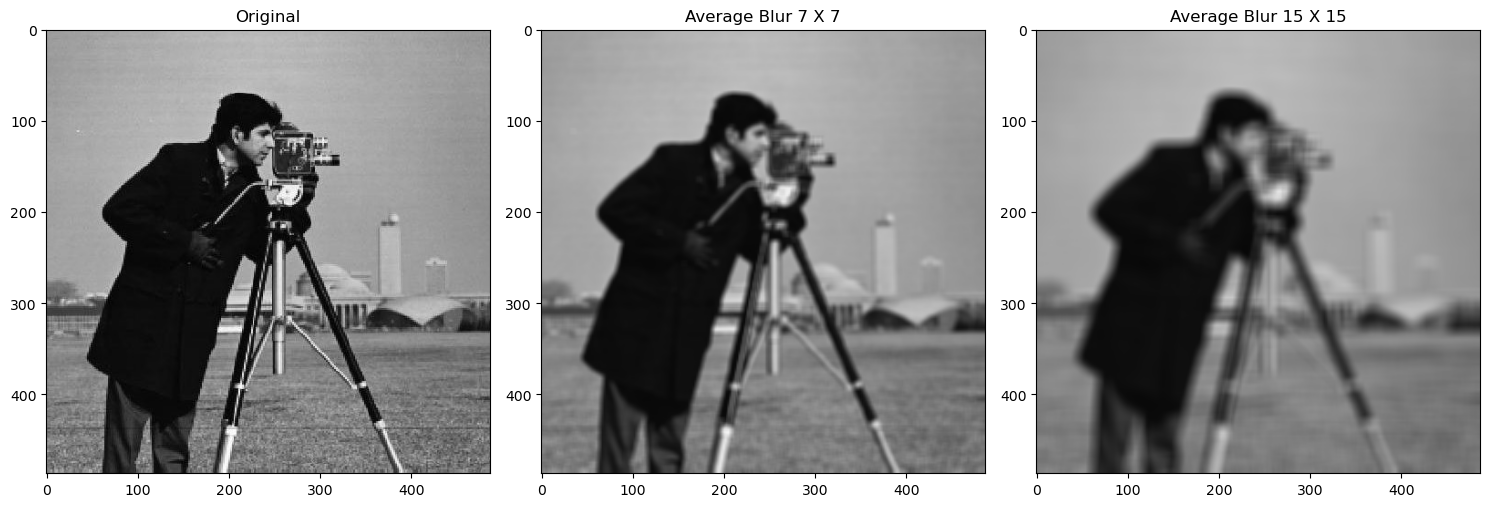

In [30]:
image = read_BGR_image_and_return_RGB_image('./Images/cameraman.jpeg')

avg_blur_7x7 = cv2.blur(image, (7, 7))  # 7x7 kernel
avg_blur_15x15 = cv2.blur(image, (15, 15))  # 15x15 kernel

figure , arr = plt.subplots(1,3, figsize = (15, 5))
arr[0].imshow(image)
arr[0].set_title('Original')
arr[1].imshow(avg_blur_7x7)
arr[1].set_title('Average Blur 7 X 7')
arr[2].imshow(avg_blur_15x15)
arr[2].set_title('Average Blur 15 X 15')

plt.tight_layout()
plt.show()

# Task 4 - B
## Perform gaussian blur with kernel size 7X7, sigma (standard deviation of the Gaussian) of 2.0 and another gaussian blur with kernel size 15X15, sigma 10. Display the original image with the filtered/processed images in a 1X3 grid.

# Solution

The code performs Gaussian blurring on the image "cameraman.jpeg" using two different kernel sizes and sigma values, and displays the results in a 1x3 grid. The steps are as follows:

1. __Read the Original Image__:
   - The image is read from the file path `./Images/cameraman.jpeg` and stored in `image`.

2. __Apply Gaussian Blur with Kernel Size 7x7 and Sigma 2.0__:
   - The `cv2.GaussianBlur()` function is used to apply Gaussian blurring with a kernel size of 7x7 and a sigma (standard deviation) of 2.0.
   - The resulting blurred image is stored in `gaussian_blur_7x7`.

3. __Apply Gaussian Blur with Kernel Size 15x15 and Sigma 10.0__:
   - The `cv2.GaussianBlur()` function is used again, this time with a kernel size of 15x15 and a sigma of 10.0.
   - The resulting blurred image is stored in `gaussian_blur_15x15`.

4. __Display Images__:
   - A 1x3 grid of subplots is created to display the original image and the two Gaussian blurred images.
   - Each subplot is titled according to the image it represents:
     - The first column shows the original image.
     - The second column displays the image blurred with a 7x7 kernel and a sigma of 2.
     - The third column displays the image blurred with a 15x15 kernel and a sigma of 10.
   - The `plt.tight_layout()` function is used to adjust the layout and avoid overlap.

By following these steps, the code effectively demonstrates the effect of Gaussian blurring on an image with different kernel sizes and sigma values, presenting the results in a clear and organized manner.


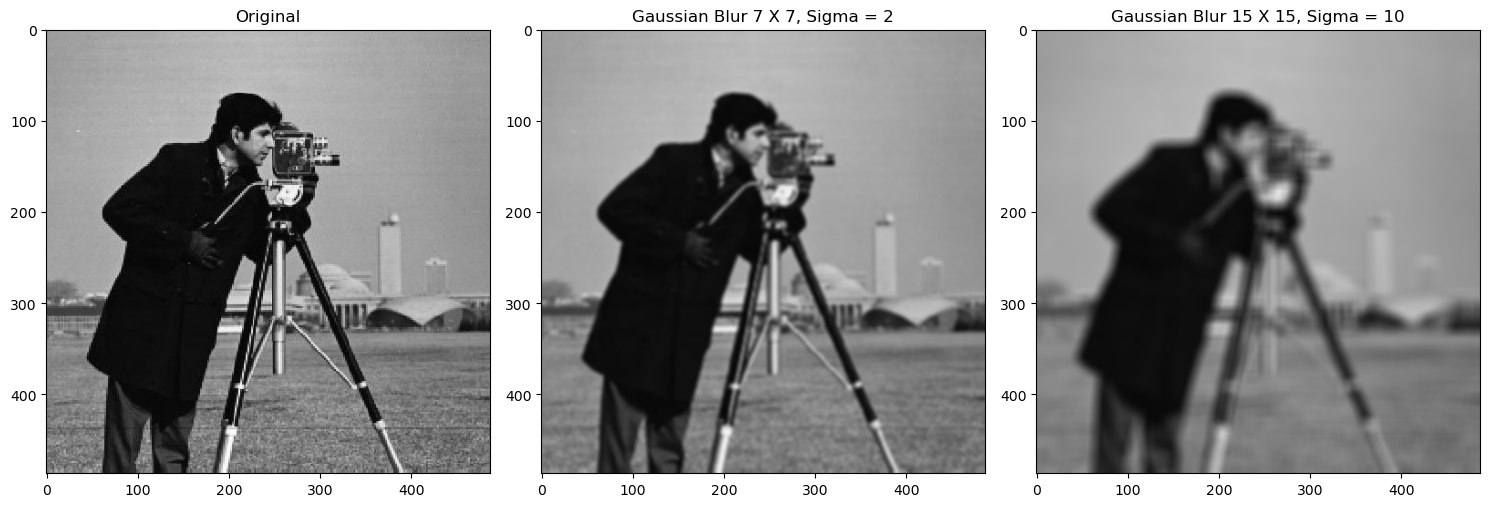

In [33]:
image = read_BGR_image_and_return_RGB_image('./Images/cameraman.jpeg')

gaussian_blur_7x7 = cv2.GaussianBlur(image, (7, 7), 2.0)

gaussian_blur_15x15 = cv2.GaussianBlur(image, (15, 15), 10.0)


figure , arr = plt.subplots(1,3, figsize = (15, 5))
arr[0].imshow(image)
arr[0].set_title('Original')
arr[1].imshow(gaussian_blur_7x7)
arr[1].set_title('Gaussian Blur 7 X 7, Sigma = 2')
arr[2].imshow(gaussian_blur_15x15)
arr[2].set_title('Gaussian Blur 15 X 15, Sigma = 10')
                                       
plt.tight_layout()
plt.show()


# Task 4 - C
## Perform median blur with kernel size 7X7 and 15X15. Display the original image with the filtered/processed images in a 1X3 grid

# Solution

The code performs median blurring on the image "cameraman.jpeg" using two different kernel sizes and displays the results in a 1x3 grid. The steps are as follows:

1. __Read the Original Image__:
   - The image is read from the file path `./Images/cameraman.jpeg` and stored in `image`.

2. __Apply Median Blur with Kernel Size 7x7__:
   - The `cv2.medianBlur()` function is used to apply median blurring with a kernel size of 7x7.
   - The resulting blurred image is stored in `median_blur_7x7`.

3. __Apply Median Blur with Kernel Size 15x15__:
   - The `cv2.medianBlur()` function is used again, this time with a kernel size of 15x15.
   - The resulting blurred image is stored in `median_blur_15x15`.

4. __Display Images__:
   - A 1x3 grid of subplots is created to display the original image and the two median blurred images.
   - Each subplot is titled according to the image it represents:
     - The first column shows the original image.
     - The second column displays the image blurred with a 7x7 kernel.
     - The third column displays the image blurred with a 15x15 kernel.
   - The `plt.tight_layout()` function is used to adjust the layout and avoid overlap.

By following these steps, the code effectively demonstrates the effect of median blurring on an image with different kernel sizes, presenting the results in a clear and organized manner.


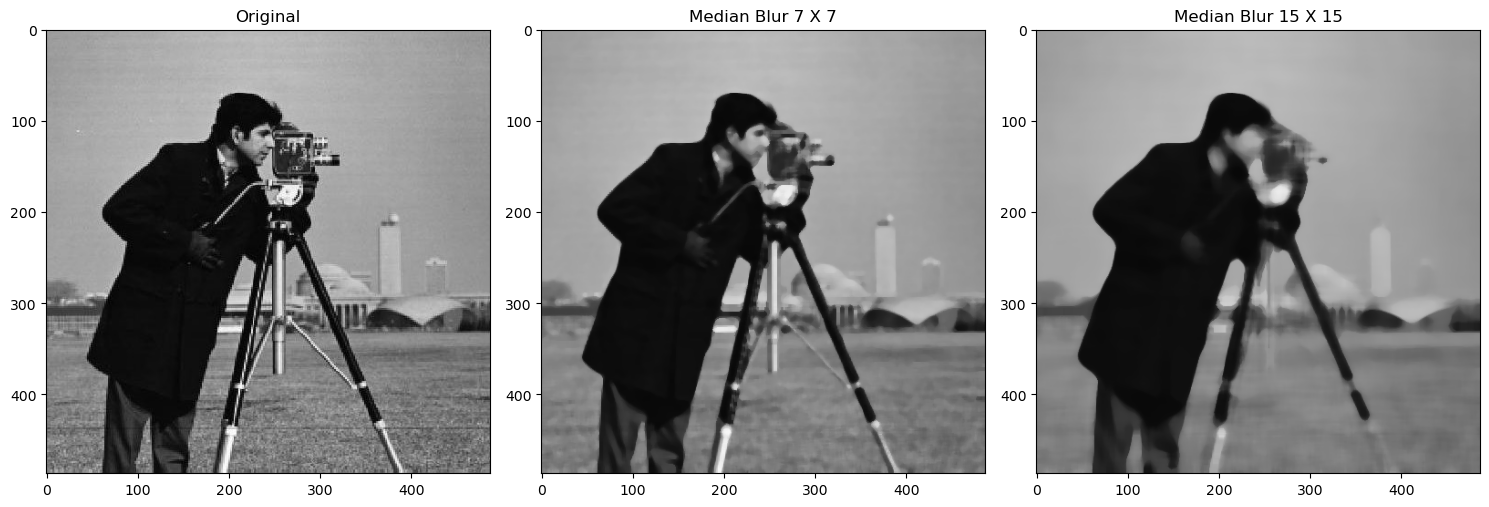

In [36]:
image = read_BGR_image_and_return_RGB_image('./Images/cameraman.jpeg')

# Apply Median blur with a 7x7 kernel
median_blur_7x7 = cv2.medianBlur(image, 7)

# Apply Median blur with a 15x15 kernel
median_blur_15x15 = cv2.medianBlur(image, 15)


figure , arr = plt.subplots(1,3, figsize = (15, 5))
arr[0].imshow(image)
arr[0].set_title('Original')
arr[1].imshow(median_blur_7x7)
arr[1].set_title('Median Blur 7 X 7')
arr[2].imshow(median_blur_15x15)
arr[2].set_title('Median Blur 15 X 15')
                                       
plt.tight_layout()
plt.show()


# Task 4 - D
## Resize the original image to 40X40 pixels. Also, resize the guassian blurred image with kernel size 15X15 and sigma 10 to 40X40 pixels. Display the original image with the resized images in a 1X3 grid.

# Solution

## Image Resizing and Display

The code performs the following steps to resize and display images:

1. __Read the Original Image__:
   - The image is read from the file path `./Images/cameraman.jpeg` and stored in `img`.

2. __Resize the Original Image__:
   - The `cv2.resize()` function is used to resize the original image to 40x40 pixels.
   - The resized image is stored in `img2`.

3. __Apply Gaussian Blur and Resize__:
   - Gaussian blur with a 15x15 kernel and a sigma of 10 is applied to the original image using `cv2.GaussianBlur()`.
   - The blurred image is then resized to 40x40 pixels using `cv2.resize()`.
   - The resized blurred image is stored in `img4`.

4. __Display Images__:
   - A 1x3 grid of subplots is created to display:
     - The original image.
     - The original image resized to 40x40 pixels.
     - The Gaussian blurred image resized to 40x40 pixels.
   - Each subplot is titled according to the image it represents:
     - The first column shows the original image.
     - The second column displays the resized original image.
     - The third column shows the Gaussian blurred image resized to 40x40 pixels.


Text(0.5, 1.0, 'Gaussian Resized to 40 X 40')

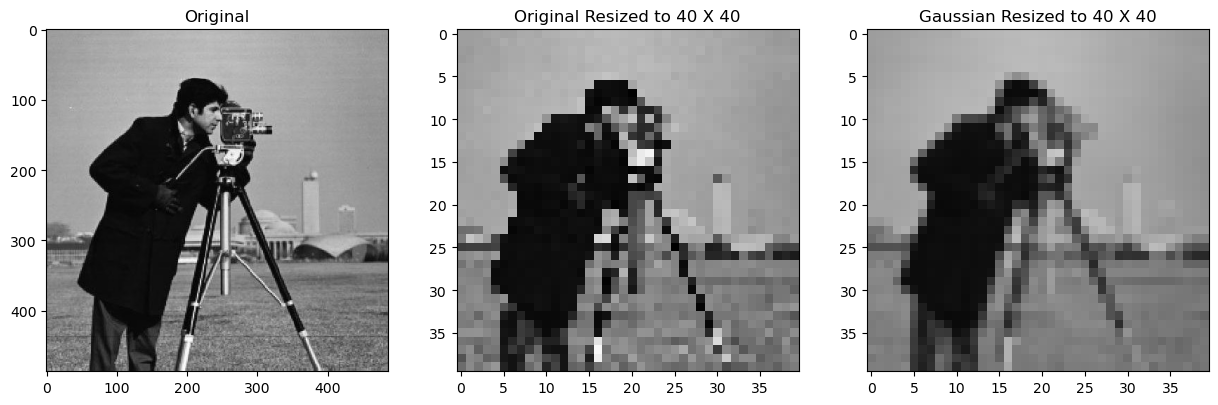

In [39]:
img = read_BGR_image_and_return_RGB_image('./Images/cameraman.jpeg')

img2 = cv2.resize(img, (40, 40))

img3 = cv2.GaussianBlur(img, (15,15), 10)
img4 = cv2.resize(img3, (40, 40))

figure, arr = plt.subplots(1, 3, figsize = (15, 5))

arr[0].imshow(img)
arr[0].set_title('Original')
arr[1].imshow(img2)
arr[1].set_title('Original Resized to 40 X 40')
arr[2].imshow(img4)
arr[2].set_title('Gaussian Resized to 40 X 40')

# Task 5 - A
## Import the "cmu.jpg" image and apply the "shadow effect" on the image. (any reasonable amount of blurring will be considered correct)

# Solution

## Applying Shadow Effect to Image

The code applies a shadow effect to an image using a Gaussian blur and some pixel manipulations. Here’s how the code works:

1. __Import the Image__:
   - The image `cmu.jpg` is read from the file path using `read_BGR_image_and_return_RGB_image()` and stored in the variable `img`.

2. __Apply Gaussian Blur__:
   - A Gaussian blur with a kernel size of 9x9 and a standard deviation (sigma) of 5 is applied to the image using `cv2.GaussianBlur()`.
   - The blurred image is stored in `blurred_img`.

3. __Add Padding__:
   - The blurred image is padded with white pixels (255) on the top and left sides using `np.pad()`. This padding adds 10 rows at the top and 10 columns on the left.
   - The padded image is stored in `padded_blur`.

4. __Crop the Padded Image__:
   - The padded image is cropped back to the original image size to align with the original dimensions.
   - This cropped image is stored in `shifted_blur`.

5. __Detect Dark Pixels in the Original Image__:
   - The code loops through each pixel in the original image `img` to identify dark pixels where all RGB values are below 50.
   - The coordinates of these dark pixels are stored in `listOfTargetRowsAndCols`.

6. __Create Shadow Effect__:
   - Two versions of the shadow effect are created:
     - `shifted_blur`: In this version, the dark pixels in `shifted_blur` are set to black (0, 0, 0).
     - `shifted_blur_2`: In this version, the dark pixels in `shifted_blur_2` are set to white (255, 255, 255).

7. __Display the Images__:
   - A 2x2 grid of subplots is created using `plt.subplots()` to display the following:
     - The original image (`img`).
     - The shadow effect with black pixels (`shifted_blur`).
     - The inverse shadow effect with white pixels (`shifted_blur_2`).
   - Titles are added to each subplot to indicate the type of image.

The final display shows the original image alongside the shadow and inverse shadow effects to visualize the impact of the applied blurring and pixel manipulations.


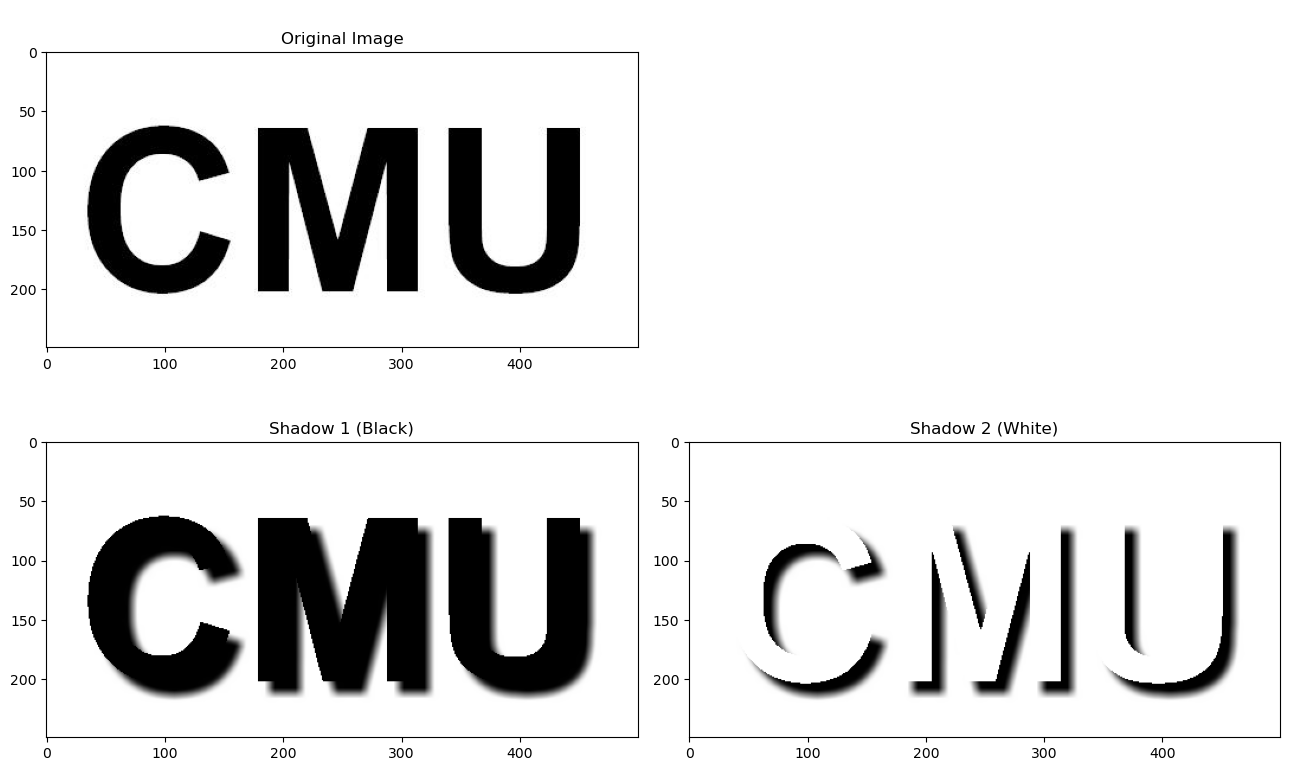

In [42]:
img = read_BGR_image_and_return_RGB_image('./Images/cmu.jpg')  # Path to your image file

blurred_img = cv2.GaussianBlur(img, (9, 9), 5)

rows, cols, _ = blurred_img.shape

# Add padding (10 rows on top, 10 columns on left), filling with white (255)
padded_blur = np.pad(blurred_img, ((10, 0), (10, 0), (0, 0)), mode='constant', constant_values=255)

# Crop the padded image back to the original size (remove extra rows/columns from bottom and right)
shifted_blur = padded_blur[:rows, :cols]

# Detect dark pixels in the original image
listOfTargetRowsAndCols = list()

rows = img.shape[0]
cols = img.shape[1]

# Loop through the image and find pixels where all RGB values are below 50 (dark pixels)
for row in range(rows):
    for col in range(cols):
        if img[row][col][0] < 50 and img[row][col][1] < 50 and img[row][col][2] < 50:
            listOfTargetRowsAndCols.append([row, col])

# Create a copy of the shifted blur image for independent modification
shifted_blur_2 = shifted_blur.copy()

# Create a shadow effect by setting dark pixel areas to black in `shifted_blur`
for row_col in listOfTargetRowsAndCols:
    shifted_blur[row_col[0]][row_col[1]][0] = 0
    shifted_blur[row_col[0]][row_col[1]][1] = 0
    shifted_blur[row_col[0]][row_col[1]][2] = 0

# Create an inverse shadow effect by setting dark pixel areas to white in `shifted_blur_2`
for row_col in listOfTargetRowsAndCols:
    shifted_blur_2[row_col[0]][row_col[1]][0] = 255
    shifted_blur_2[row_col[0]][row_col[1]][1] = 255
    shifted_blur_2[row_col[0]][row_col[1]][2] = 255

# Display the original image, the shadowed image, and the inverse shadowed image
figure, arr = plt.subplots(2, 2, figsize=(13, 8))  # Create a 1x3 grid for displaying images
arr[0][0].imshow(img)
arr[0][0].set_title('Original Image')
arr[0][1].axis('off')
arr[1][0].imshow(shifted_blur)
arr[1][0].set_title('Shadow 1 (Black)')
arr[1][1].imshow(shifted_blur_2)
arr[1][1].set_title('Shadow 2 (White)')

# Ensure tight layout for better spacing between images
plt.tight_layout()
plt.show()

# Task 5 - B
## Import the "dallas.jpg" image and apply the "tilt shift effect" on the image where rows 400-500 is in the focus. (any reasonable amount of blurring of the foreground and background will be considered as correct)

# Solution

## Applying Tilt-Shift Effect to Image

The code applies a tilt-shift effect to an image, focusing on the rows 400-500 while blurring other areas. Here’s a step-by-step explanation of how the code works:

1. __Import the Image__:
   - The image `dallas.jpg` is read from the file path using `read_BGR_image_and_return_RGB_image()` and stored in the variable `img`.
   - A copy of this image is created and stored in `img2` to preserve the original for comparison.

2. __Apply Gaussian Blur__:
   - The entire image `img` is blurred using a Gaussian blur with a kernel size of 9x9 and a standard deviation (sigma) of 5. This blurred image is stored in `blurred_img`.

3. __Define the Focus Area__:
   - The focus area is defined as the rows from 400 to 500. To achieve this, the code first identifies all pixel coordinates in the focus area and in the blurred background (rows 0-200 and 300-400).

4. __Extract and Restore Focus Area__:
   - The pixel values from the focus area (rows 400-500) are copied from the blurred image to the original image `img` to keep them sharp.
   - The pixel values from rows 0-200 and 300-400 are also copied from the blurred image to the original image to ensure that these regions remain blurred.

5. __Display the Images__:
   - A 1x2 grid of subplots is created using `plt.subplots()` to display:
     - The original image (`img2`).
     - The image with the tilt-shift effect applied (`img`), showing the focus area in sharp detail and the surrounding areas blurred.

The result visually emphasizes the focused region with clear details while applying a blur effect to the rest of the image, creating a tilt-shift effect.


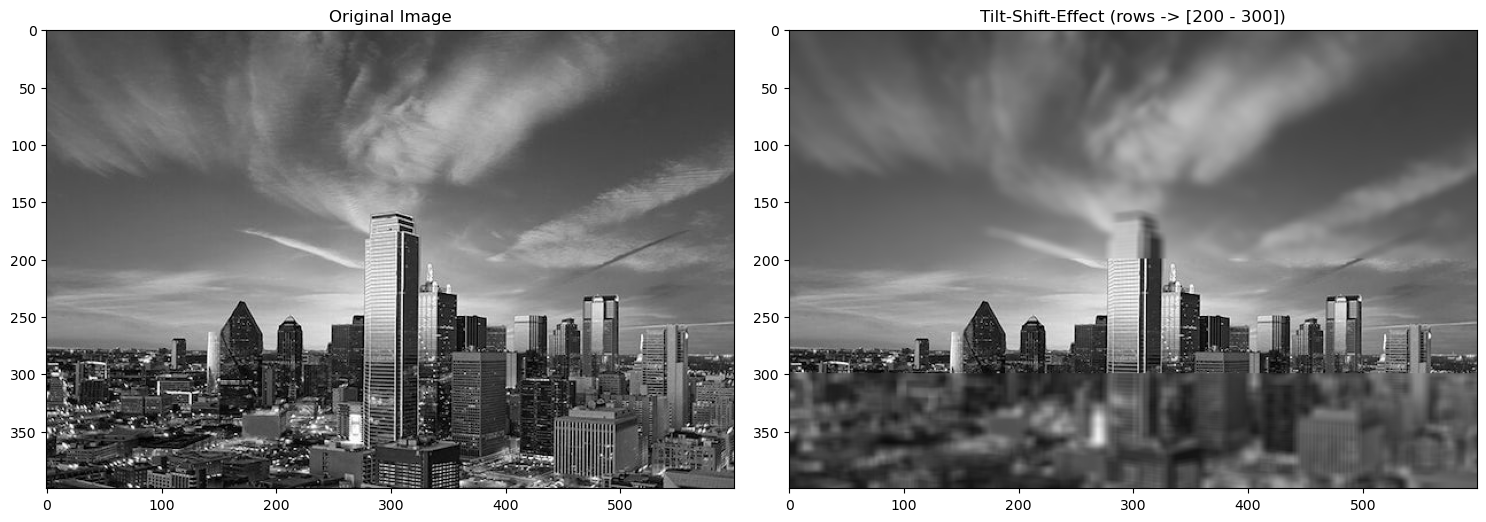

In [45]:
img = read_BGR_image_and_return_RGB_image('./Images/dallas.jpg')
img2 = img.copy()

# -----------------------------------------------------------------

blurred_img = cv2.GaussianBlur(img, (9, 9), 5)

# -----------------------------------------------------------------

targetRowsAndCols = list()

for row in range(0 , 200):
    for col in range(0 , 600):
        l = list()
        l.append(row)
        l.append(col)
        l.append(blurred_img[row][col][0])
        l.append(blurred_img[row][col][1])
        l.append(blurred_img[row][col][2])
        targetRowsAndCols.append(l)

for row in range(300 , 400):
    for col in range(0 , 600):
        l = list()
        l.append(row)
        l.append(col)
        l.append(blurred_img[row][col][0])
        l.append(blurred_img[row][col][1])
        l.append(blurred_img[row][col][2])
        targetRowsAndCols.append(l)


for row_col_r_g_b in targetRowsAndCols:
    row = row_col_r_g_b[0]
    col = row_col_r_g_b[1]
    red = row_col_r_g_b[2]
    green = row_col_r_g_b[3]
    blue = row_col_r_g_b[4]
    
    img[row][col][0] = red
    img[row][col][1] = green
    img[row][col][2] = blue


figure , arr = plt.subplots(1, 2 , figsize = (15, 5))
arr[0].imshow(img2)
arr[0].set_title("Original Image")
arr[1].imshow(img)
arr[1].set_title("Tilt-Shift-Effect (rows -> [200 - 300])")

plt.tight_layout()
plt.show()